# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# import dataset

In [2]:
df = pd.read_csv('/content/supermarket_sales.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# data processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
# change column names to best practice one
df.columns = df.columns.str.lower().str.replace(' ', '_', regex= True)

# check
print(df.columns)

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'total', 'date',
       'time', 'payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'rating'],
      dtype='object')


In [6]:
# check null values when convert to datetime data type
print(f"sum of null after convert= {pd.to_datetime(df['date'], format= 'mixed').isna().sum()}")

sum of null after convert= 0


In [7]:
# change Date column to datetime data type
df['date'] = pd.to_datetime(df['date'], format= 'mixed')

# check
print(f"data type: {df['date'].dtype}")

data type: datetime64[ns]


In [8]:
# check duplicated values
print(f"sum of duplicated values= {df.duplicated().sum()}")

sum of duplicated values= 0


In [9]:
# check data validity for object column.

for col in df.columns:
    if (df[col].dtype == 'object') & (df[col].nunique() < 15):
        print(f"column name: {col}")
        print(f"unique values: \n{df[col].unique()}\n")

column name: branch
unique values: 
['A' 'C' 'B']

column name: city
unique values: 
['Yangon' 'Naypyitaw' 'Mandalay']

column name: customer_type
unique values: 
['Member' 'Normal']

column name: gender
unique values: 
['Female' 'Male']

column name: product_line
unique values: 
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']

column name: payment
unique values: 
['Ewallet' 'Cash' 'Credit card']



In [10]:
# check data validity for numeriacal columns
df.select_dtypes(include= 'number').describe().round(2)

,unit_price,quantity,tax_5%,total,cogs,gross_margin_percentage,gross_income,rating
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00
25%,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00
75%,77.94,8.00,22.45,471.35,448.90,4.76,22.45,8.50
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00


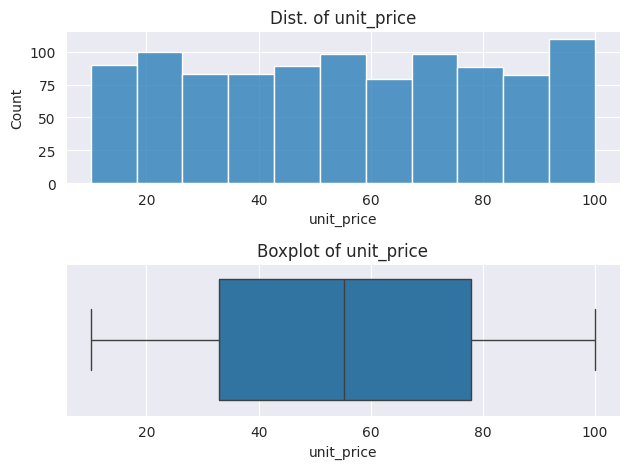

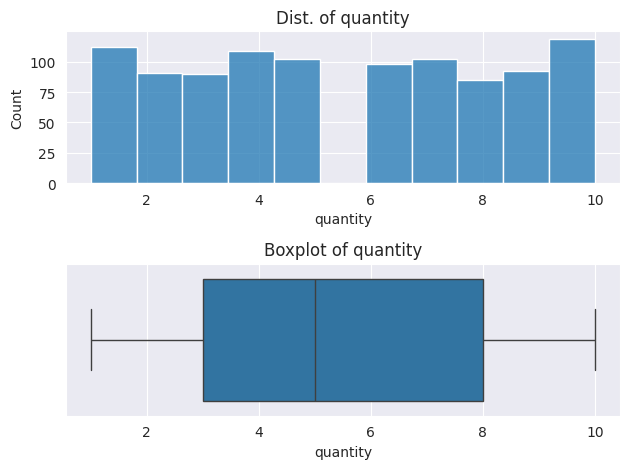

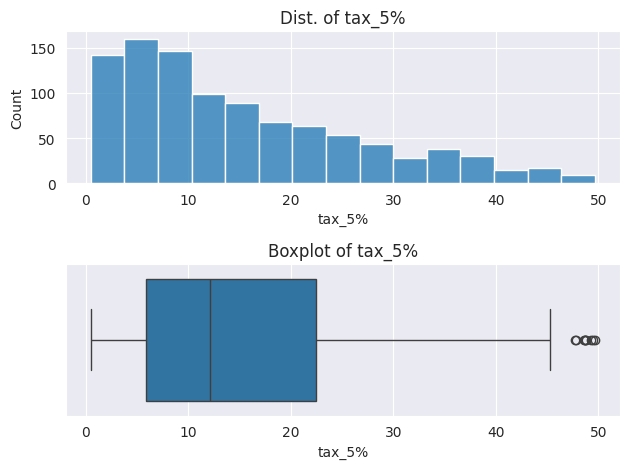

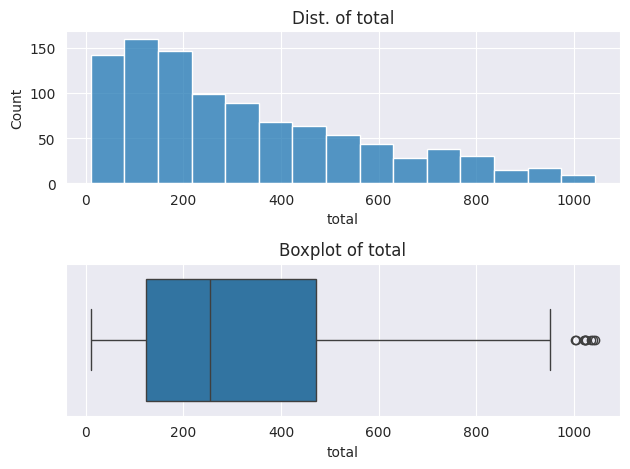

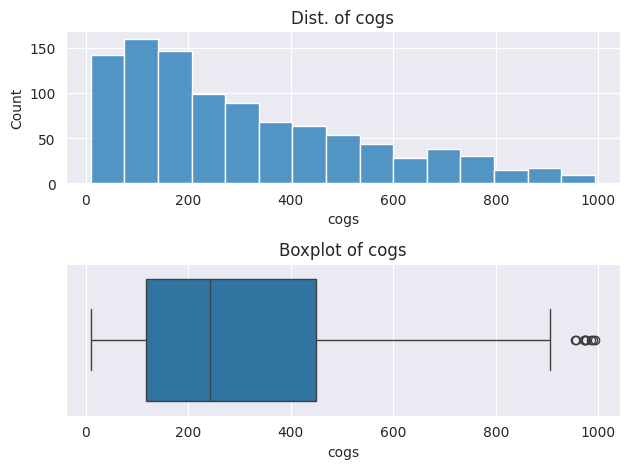

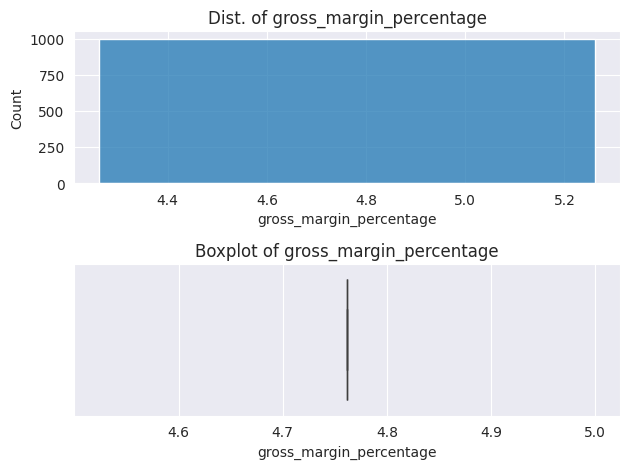

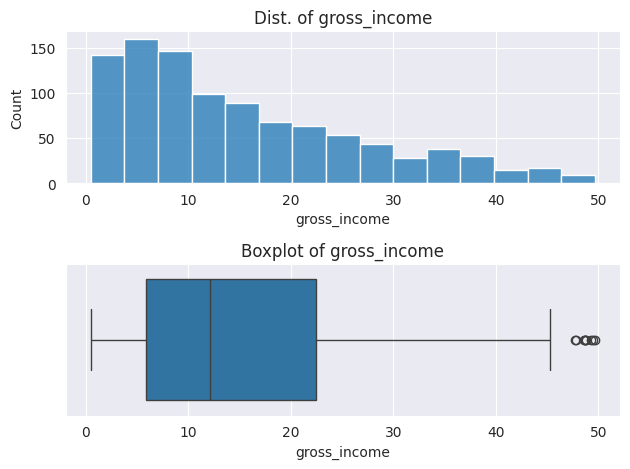

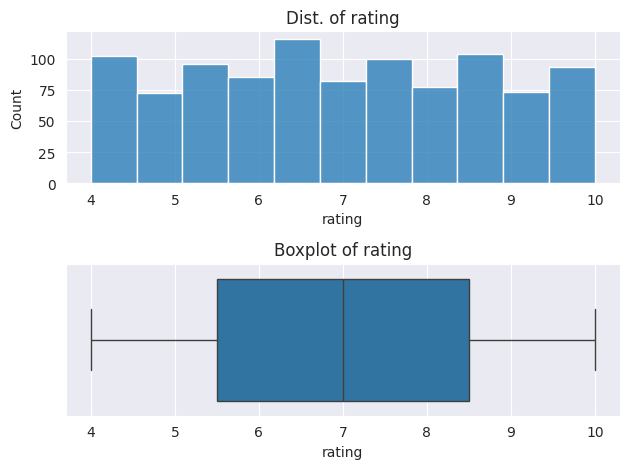

In [11]:
# check outliers
data= df.select_dtypes(include= 'number')

for col in data.columns:
    plt.subplot(2, 1, 1)
    sns.histplot(data= data, x= col, bins= 'auto')
    plt.title(f"Dist. of {col}")

    plt.subplot(2, 1, 2)
    sns.boxplot(data= data, x= col)
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

# analysis data